# Yêu cầu:
1. Sử dụng Haar Cascade Classifier để nhận diện gương mặt trong ảnh
2. Sử dụng các kỹ thuật để remove duplicated bounding boxes

In [1]:
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
%matplotlib inline

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [9]:
imgs = []
import os
for img in os.listdir('data'):
    imgs.append('data/'+img)

In [22]:
import numpy as np

## Haar Cascade Classifier

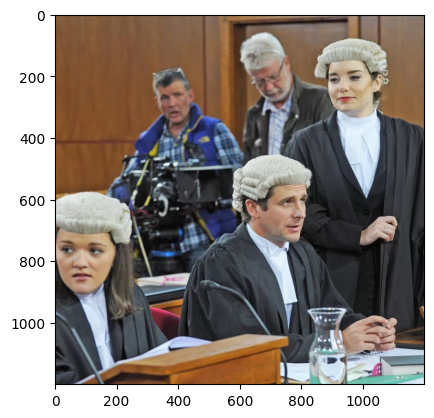

In [12]:
img = cv2.imread(imgs[1])
img = convertToRGB(img)
plt.imshow(img)
plt.show()

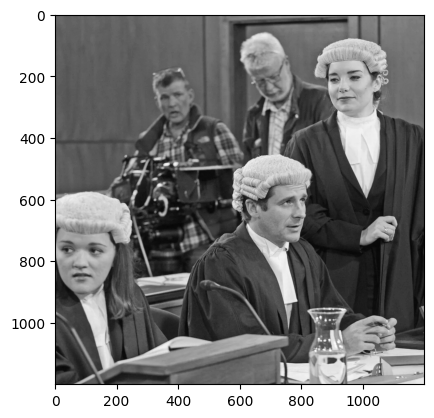

In [13]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')
plt.show()

In [14]:
gray_img.shape

(1200, 1200)

In [15]:
haar_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [16]:
faces_rect = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

 Higher the values of the “minNeighbors”, less will be the number of false positives, and less error will be in terms of false detection of faces. However, there is a chance of missing some unclear face traces as well.

In [17]:
faces_rect

array([[317, 213, 136, 136],
       [851, 138, 176, 176],
       [875, 101, 239, 239],
       [695, 545, 170, 170]])

In [18]:
img.shape

(1200, 1200, 3)

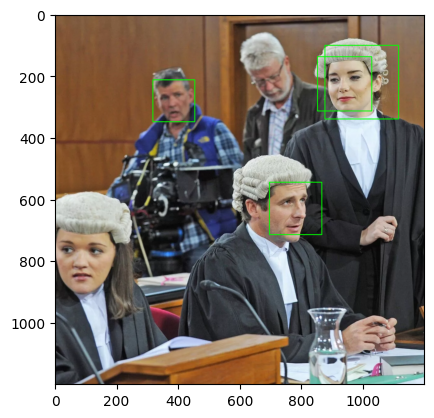

In [19]:
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

plt.imshow(img)
plt.show()

## solutions: NMS

In [20]:
def calculate_iou(bboxes):
    """Calculate Intersection over Union (IoU) for each bounding box pair.

    Args:
        bboxes (ndarray): Array of shape (N, 4) representing the bounding boxes
                          where each row contains x, y, width, height.

    Returns:
        ndarray: Array of shape (N, N) containing the IoU values for each bounding
                 box pair.
    """
    x1 = bboxes[:, 0]
    y1 = bboxes[:, 1]
    x2 = x1 + bboxes[:, 2]
    y2 = y1 + bboxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    intersection_areas = np.maximum(0, np.minimum(x2, x2[:, np.newaxis]) - np.maximum(x1, x1[:, np.newaxis]) + 1) * np.maximum(0, np.minimum(y2, y2[:, np.newaxis]) - np.maximum(y1, y1[:, np.newaxis]) + 1)
    union_areas = areas[:, np.newaxis] + areas - intersection_areas

    iou = intersection_areas / union_areas

    return iou

In [23]:
ious = (calculate_iou(faces_rect))

In [24]:
ious

array([[1.       , 0.       , 0.       , 0.       ],
       [0.       , 1.       , 0.4378638, 0.       ],
       [0.       , 0.4378638, 1.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       ]])

In [25]:
def find_indices(diagonal_array):
    """Find row and column indices of elements in a diagonal array.

    Args:
        diagonal_array (ndarray): Diagonal array.

    Returns:
        tuple: Tuple containing two ndarrays representing the row indices and column indices.
    """
    mask = np.logical_and(diagonal_array > 0, diagonal_array < 1)
    row_indices, col_indices = np.where(mask)

    return row_indices, col_indices

In [26]:
def remove_duplicates(arr_list):
    """Remove duplicate arrays from a list, considering the order of elements.

    Args:
        arr_list (list): List of arrays.

    Returns:
        list: List with duplicates removed.
    """
    unique_set = set()

    for arr in arr_list:
        sorted_arr = tuple(sorted(arr))
        unique_set.add(sorted_arr)

    return [list(arr) for arr in unique_set]

In [27]:
result = remove_duplicates(find_indices(ious))

In [28]:
result[0][0]

1

In [29]:
faces_rect

array([[317, 213, 136, 136],
       [851, 138, 176, 176],
       [875, 101, 239, 239],
       [695, 545, 170, 170]])

In [30]:
idx = result[0][1]
all_idx = list(range(len(faces_rect)))
all_idx.remove(idx)


In [31]:
new_face = faces_rect[all_idx]

In [32]:
new_face

array([[317, 213, 136, 136],
       [851, 138, 176, 176],
       [695, 545, 170, 170]])

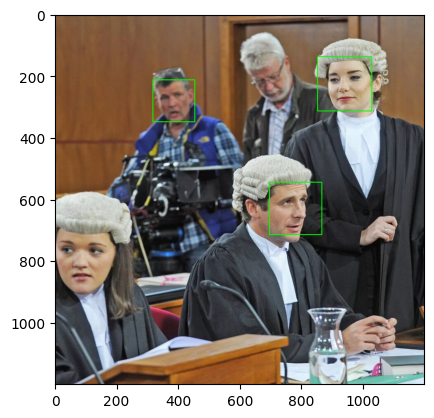

In [34]:
img = cv2.imread(imgs[1])
img = convertToRGB(img)
for (x, y, w, h) in new_face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

plt.imshow(img)
plt.show()